In [91]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [92]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [93]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

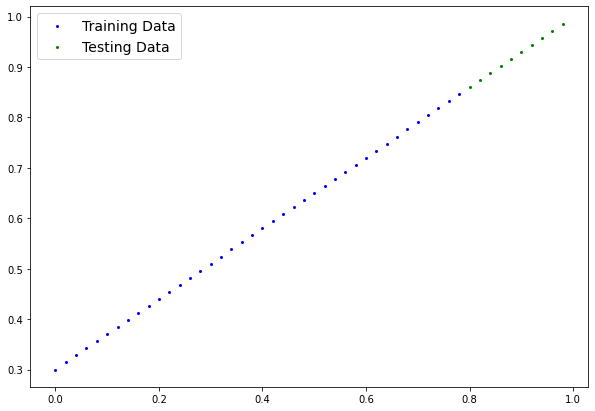

In [94]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):

    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=4,label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

plot_predictions()

In [95]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [96]:
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.8921], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.3948], requires_grad=True)]

In [97]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.8921], dtype=torch.float64)),
             ('bias', tensor([0.3948]))])

In [98]:
with torch.inference_mode():
    y_preds = model_0(X_test)

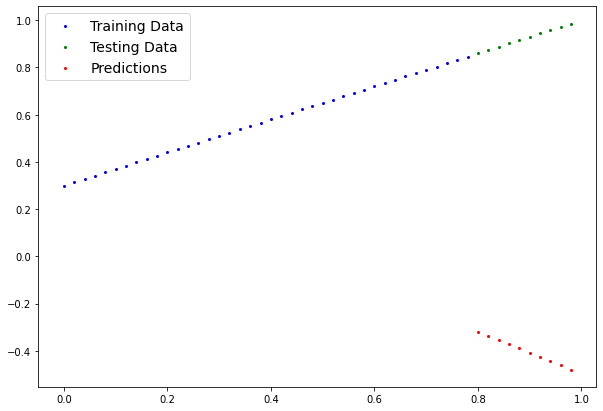

In [99]:
plot_predictions(predictions = y_preds)

In [100]:
y_test-y_preds

tensor([[1.1789],
        [1.2108],
        [1.2426],
        [1.2744],
        [1.3063],
        [1.3381],
        [1.3700],
        [1.4018],
        [1.4337],
        [1.4655]], dtype=torch.float64)